# Disentangling biotic and abiotic drivers of a neotropical mistletoe

By **Eduardo Oliveira**

# Classification trees

In [15]:
import os
print(os.getcwd())

C:\Users\eduar\Documents\GitHub\Machine-learning_mistletoe


In [24]:
##Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import random


In [27]:
dados=pd.read_excel('mpa_data.xlsx') 
dados.head()

,Probu,Ecris,Qdich,Qgran,Qmult,Qparv,Sconv,Srufi,Tviri,Tsaya,...,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,0,0,0,0,0,0,0,0,0,0,...,27.423880,26.658577,2385.569336,308.298615,68.708336,46.272377,899.395813,240.805557,481.097229,898.743042
1,0,0,0,0,0,0,0,0,0,0,...,10.543689,2.557250,139.344711,34.146229,1.745033,92.661461,84.748985,8.115894,9.313376,84.747543
2,0,1,0,0,0,0,0,0,0,0,...,24.399378,21.149464,1744.458374,314.284729,4.944445,81.239296,859.416687,32.694443,628.708313,35.055557
3,0,0,0,0,0,0,0,0,0,0,...,27.564198,26.671471,2469.083252,334.104156,62.951389,48.736038,959.750000,229.868057,491.041656,959.750000
4,0,0,0,0,0,0,0,0,0,0,...,17.352907,3.630967,193.381943,24.104166,10.277778,27.987505,63.868057,34.451389,42.895832,52.166668


In [33]:
#Checking for the presence and absence of the mistletoe
pd.crosstab(dados['Probu'],columns='Total')

col_0,Total
Probu,
0,134
1,134


In [35]:
# Separates the predictor variables (X) and the response (y)
X = dados.drop('Probu', axis=1) 
y = dados['Probu']

In [37]:
# Training and test data: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Create a decision tree
# DecisionTreeClassifier algorithm
arvore = DecisionTreeClassifier(max_depth=3)

# Train the decision tree using the training data
arvore.fit(X_train, y_train)

# Use the decision tree to predict the labels for the test set
y_pred = arvore.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Accuracy
acc = accuracy_score(y_test, y_pred)

print('Performance metrics for supervised learning in binary classification')
print("\nAccuracy:", np.round(acc,3))

# For class 1
precision = precision_score(y_test, y_pred, pos_label=1,zero_division=0)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print("\nPrecision (for class 1):", np.round(precision,3))
print("Recall (for class 1):", np.round(recall,3))
print("F1-score (for class 1):", np.round(f1,3))

# For class 0
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print("\nPrecision (for class 0):", np.round(precision,3))
print("Recall (for class 0):", np.round(recall,3))
print("F1-score (for class 0):", np.round(f1,3))

Performance metrics for supervised learning in binary classification

Accuracy: 0.889

Precision (for class 1): 0.833
Recall (for class 1): 0.909
F1-score (for class 1): 0.87

Precision (for class 0): 0.933
Recall (for class 0): 0.875
F1-score (for class 0): 0.903


# Evaluation metrics (based on the confusion matrix)

In [66]:
from sklearn.model_selection import GridSearchCV

# Using cross-validation to find the best tree
param_grid = {
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 6)
}

grid = GridSearchCV(arvore, param_grid, cv=2)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

# Best tree chosen
print(f"best parameters: {grid.best_params_}")
print(f"Accuracy of best tree: {grid.best_score_}")

best parameters: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of best tree: 0.8738317757009346


In [67]:
# Accuracy
acc = accuracy_score(y_test, y_pred)

print('Performance metrics for supervised learning in binary classification')
print("\nAccuracy:", np.round(acc,3))

# For class 1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print("\nPrecision (for class 1):", np.round(precision,3))
print("Recall (for class 1):", np.round(recall,3))
print("F1-score (for class 1):", np.round(f1,3))

# For class 0
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print("\nPrecision (for class 0):", np.round(precision,3))
print("Recall (for class 0):", np.round(recall,3))
print("F1-score (for class 0):", np.round(f1,3))

Performance metrics for supervised learning in binary classification

Accuracy: 0.87

Precision (for class 1): 0.826
Recall (for class 1): 0.864
F1-score (for class 1): 0.844

Precision (for class 0): 0.903
Recall (for class 0): 0.875
F1-score (for class 0): 0.889


In [68]:
#Assessing the importance of variables

import pandas as pd

importances = arvore.feature_importances_

feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


   Feature  Importance
4    Qparv    0.713251
27   bio14    0.097609
12   Vthyr    0.087126
21    bio8    0.050787
0    Ecris    0.028346
25   bio12    0.022881
24   bio11    0.000000
20    bio7    0.000000
22    bio9    0.000000
23   bio10    0.000000
26   bio13    0.000000
18    bio5    0.000000
28   bio15    0.000000
29   bio16    0.000000
30   bio17    0.000000
31   bio18    0.000000
19    bio6    0.000000
16    bio3    0.000000
17    bio4    0.000000
1    Qdich    0.000000
15    bio2    0.000000
14    bio1    0.000000
13   Vtuca    0.000000
11   Vrufa    0.000000
10   Velli    0.000000
9    Vcinn    0.000000
8    Tsaya    0.000000
7    Tviri    0.000000
6    Srufi    0.000000
5    Sconv    0.000000
3    Qmult    0.000000
2    Qgran    0.000000
32   bio19    0.000000


In [61]:
#!pip install openpyxl
import openpyxl as op

# Save
importance_df.to_excel('feature_importance.xlsx', index=False, engine='openpyxl')


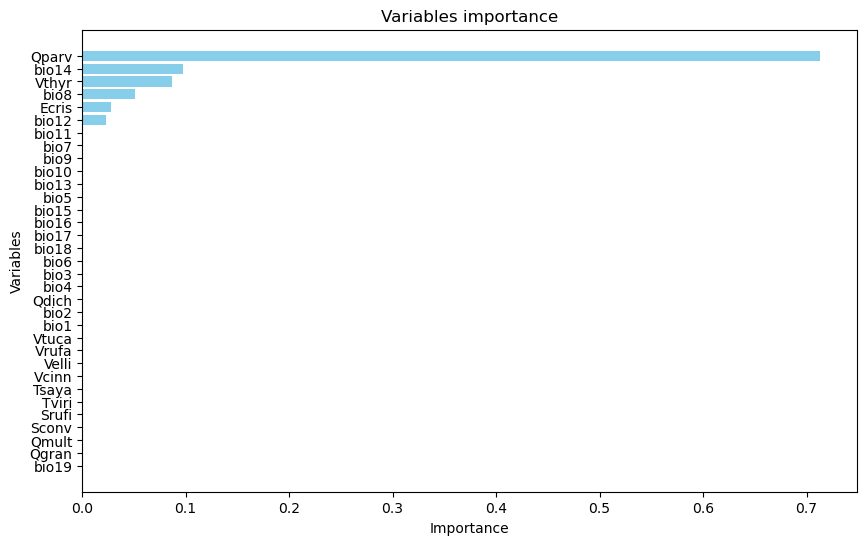

In [63]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis() 
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.title('Variables importance')

# Save
plt.savefig('importance_var.jpg', dpi=300, bbox_inches='tight')#png
plt.show()


# Bagging algorithm

In [73]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()

bagging = BaggingClassifier(estimator=tree, n_estimators=20, random_state=42)

bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)


In [75]:
# Evaluates the performance of the bagging classifier on the test data
score = bagging.score(X_test, y_test)

print('Performance metrics for supervised learning in binary classification')
print("\nAccuracy:", np.round(score,3))

# for class 1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print("\nPrecision (for class 1):", np.round(precision,3))
print("Recall (for class 1):", np.round(recall,3))
print("F1-score (for class 1):", np.round(f1,3))

# for class 0
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print("\nPrecision (for class 0):", np.round(precision,3))
print("Recall (for class 0):", np.round(recall,3))
print("F1-score (for class 0):", np.round(f1,3))

Performance metrics for supervised learning in binary classification

Accuracy: 0.889

Precision (for class 1): 0.833
Recall (for class 1): 0.909
F1-score (for class 1): 0.87

Precision (for class 0): 0.933
Recall (for class 0): 0.875
F1-score (for class 0): 0.903


In [77]:
#Assessing the importance of variables

import numpy as np
import pandas as pd

feature_importances = [
    tree.feature_importances_ for tree in bagging.estimators_
]

mean_importances = np.mean(feature_importances, axis=0)

feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': mean_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


   Feature  Importance
4    Qparv    0.428346
2    Qgran    0.086105
28   bio15    0.068282
21    bio8    0.057328
12   Vthyr    0.048160
30   bio17    0.033859
15    bio2    0.030128
27   bio14    0.027597
0    Ecris    0.027346
17    bio4    0.024697
25   bio12    0.023829
31   bio18    0.017174
20    bio7    0.015999
24   bio11    0.015395
18    bio5    0.014084
26   bio13    0.010397
16    bio3    0.010049
14    bio1    0.008332
5    Sconv    0.007621
19    bio6    0.006986
29   bio16    0.006958
23   bio10    0.006060
13   Vtuca    0.005963
32   bio19    0.004963
8    Tsaya    0.004286
1    Qdich    0.002713
7    Tviri    0.002416
3    Qmult    0.001633
22    bio9    0.001444
6    Srufi    0.001007
10   Velli    0.000844
11   Vrufa    0.000000
9    Vcinn    0.000000


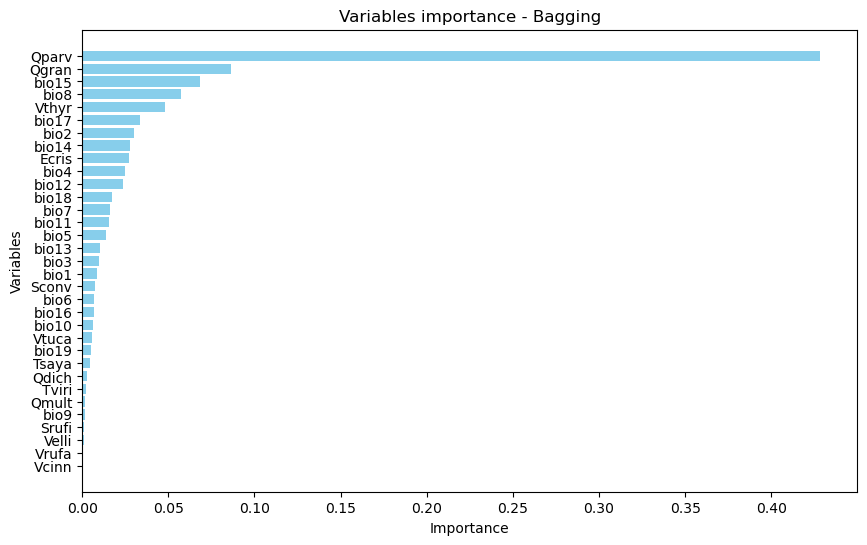

In [79]:
# Viewing the results

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.title('Variables importance - Bagging')

# Save
plt.savefig('importance_var_bag.jpg', dpi=300, bbox_inches='tight')#png
plt.show()


# Boosting algorithm

In [82]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(max_depth=3)

adaboost = AdaBoostClassifier(estimator=tree, n_estimators=50, learning_rate=1, random_state=42)

adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

score = adaboost.score(X_test, y_test)

print('Performance metrics for supervised learning in binary classification')
print("\nAccuracy:", np.round(score,3))

# For class 1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print("\nPrecision (for class 1):", np.round(precision,3))
print("Recall (for class 1):", np.round(recall,3))
print("F1-score (for class 1):", np.round(f1,3))

# For class 0
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print("\nPrecision (for class 0):", np.round(precision,3))
print("Recall (for class 0):", np.round(recall,3))
print("F1-score (for class 0):", np.round(f1,3))

C:\Users\eduar\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performance metrics for supervised learning in binary classification

Accuracy: 0.852

Precision (for class 1): 0.792
Recall (for class 1): 0.864
F1-score (for class 1): 0.826

Precision (for class 0): 0.9
Recall (for class 0): 0.844
F1-score (for class 0): 0.871


# Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print('Performance metrics for supervised learning in binary classification')
print("\nAccuracy:", np.round(acc,3))

# For class 1
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print("\nPrecision (for class 1):", np.round(precision,3))
print("Recall (for class 1):", np.round(recall,3))
print("F1-score (for class 1):", np.round(f1,3))

# For class 0
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print("\nPrecision (for class 0):", np.round(precision,3))
print("Recall (for class 0):", np.round(recall,3))
print("F1-score (for class 0):", np.round(f1,3))

Performance metrics for supervised learning in binary classification

Accuracy: 0.907

Precision (for class 1): 0.815
Recall (for class 1): 1.0
F1-score (for class 1): 0.898

Precision (for class 0): 1.0
Recall (for class 0): 0.844
F1-score (for class 0): 0.915


In [86]:
# Variables importance

import pandas as pd

importances = clf.feature_importances_

feature_names = X_train.columns 
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the variables by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


   Feature  Importance
4    Qparv    0.145303
2    Qgran    0.090139
28   bio15    0.076616
17    bio4    0.052279
24   bio11    0.051833
30   bio17    0.048017
3    Qmult    0.041778
27   bio14    0.036483
16    bio3    0.034860
19    bio6    0.033544
21    bio8    0.032805
20    bio7    0.032416
32   bio19    0.031997
14    bio1    0.031676
23   bio10    0.028069
22    bio9    0.026788
25   bio12    0.026499
15    bio2    0.024241
26   bio13    0.021870
18    bio5    0.020544
29   bio16    0.018303
0    Ecris    0.016020
31   bio18    0.015651
5    Sconv    0.015253
13   Vtuca    0.011307
11   Vrufa    0.010244
1    Qdich    0.010234
12   Vthyr    0.005699
9    Vcinn    0.003769
10   Velli    0.002555
8    Tsaya    0.002089
6    Srufi    0.000610
7    Tviri    0.000511


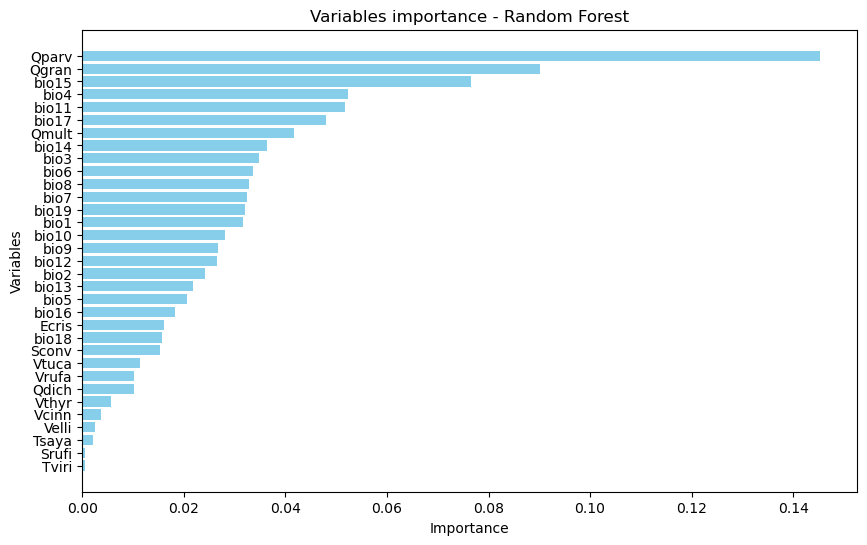

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.title('Variables importance - Random Forest')

# Save
plt.savefig('importance_var_RF.jpg', dpi=300, bbox_inches='tight')#png
plt.show()

# Calculate the Shapley values

# Random Forest

In [108]:
pip install shap scikit-learn pandas numpy matplotlib


INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of numba to determine which version is compatible with other requirements. This could take a while.
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.9 kB 991.0 kB/s eta 0:00:01
     ---------------------------------------- 60.9/60.9 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ------- -------------------------------- 102.4/549.3 kB 6.1 MB/s eta 0:00:01
   -------------- ------------------------- 204.8/549.3 kB 3.1 MB/s eta 0:00:01
   ------------------------ --------------- 337.9/549.3 kB 3.0 MB/s eta 0:00:01
   --------------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.2.6 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.6 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


In [110]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [111]:
# load data 
dados=pd.read_excel('mpa_data.xlsx') 
dados.head()


,Probu,Ecris,Qdich,Qgran,Qmult,Qparv,Sconv,Srufi,Tviri,Tsaya,...,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,0,0,0,0,0,0,0,0,0,0,...,27.423880,26.658577,2385.569336,308.298615,68.708336,46.272377,899.395813,240.805557,481.097229,898.743042
1,0,0,0,0,0,0,0,0,0,0,...,10.543689,2.557250,139.344711,34.146229,1.745033,92.661461,84.748985,8.115894,9.313376,84.747543
2,0,1,0,0,0,0,0,0,0,0,...,24.399378,21.149464,1744.458374,314.284729,4.944445,81.239296,859.416687,32.694443,628.708313,35.055557
3,0,0,0,0,0,0,0,0,0,0,...,27.564198,26.671471,2469.083252,334.104156,62.951389,48.736038,959.750000,229.868057,491.041656,959.750000
4,0,0,0,0,0,0,0,0,0,0,...,17.352907,3.630967,193.381943,24.104166,10.277778,27.987505,63.868057,34.451389,42.895832,52.166668


In [96]:
dados.columns

Index(['Probu', 'Ecris', 'Qdich', 'Qgran', 'Qmult', 'Qparv', 'Sconv', 'Srufi',
       'Tviri', 'Tsaya', 'Vcinn', 'Velli', 'Vrufa', 'Vthyr', 'Vtuca', 'bio1',
       'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9', 'bio10',
       'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18',
       'bio19'],
      dtype='object')

In [114]:
# Define predictor variables (X) and response variable (y)
var_preds = ['Ecris', 'Qdich', 'Qgran', 'Qmult', 'Qparv', 'Sconv', 'Srufi',
       'Tviri', 'Tsaya', 'Vcinn', 'Velli', 'Vrufa', 'Vthyr', 'Vtuca', 'bio1',
       'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9', 'bio10',
       'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18',
       'bio19']  
X = dados[var_preds]
y = dados["Probu"]  


In [116]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [120]:
# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9074074074074074


In [122]:
# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [124]:
print(type(shap_values))  
print(len(shap_values))   
print(np.array(shap_values).shape) 


<class 'numpy.ndarray'>
54
(54, 33, 2)


In [160]:
import matplotlib.pyplot as plt

plt.figure()  
shap.summary_plot(shap_values_selected, X_test, show=False)  
plt.savefig("shap_summary.png", dpi=600, bbox_inches="tight") 
plt.close() 


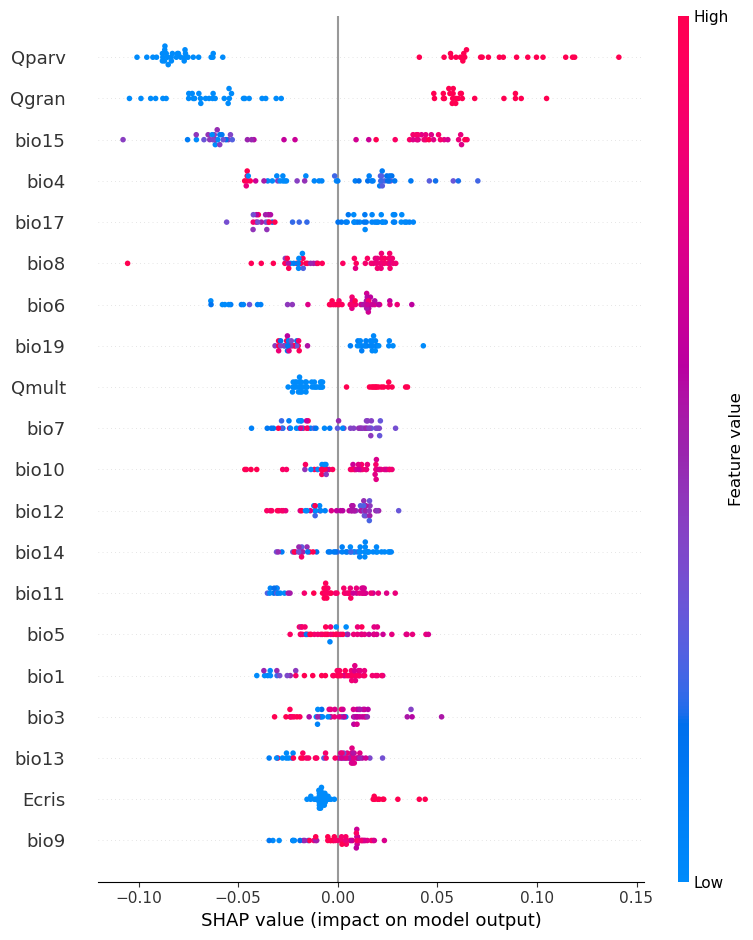

In [161]:
shap_values_selected = shap_values[:, :, 1]  
shap.summary_plot(shap_values_selected, X_test)


In [138]:
print(X_test.columns)

Index(['Ecris', 'Qdich', 'Qgran', 'Qmult', 'Qparv', 'Sconv', 'Srufi', 'Tviri',
       'Tsaya', 'Vcinn', 'Velli', 'Vrufa', 'Vthyr', 'Vtuca', 'bio1', 'bio2',
       'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9', 'bio10',
       'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18',
       'bio19'],
      dtype='object')


# Absolute average of Shap Values

In [143]:
import pandas as pd
import numpy as np

mean_shap_values = np.abs(shap_values_selected).mean(axis=0)

shap_df = pd.DataFrame({"Variável": X_test.columns, "Mean_SHAP": mean_shap_values})

shap_df = shap_df.sort_values(by="Mean_SHAP", ascending=False)

print(shap_df)

shap_df.to_csv("shap_mean_values.csv", index=False)


   Variável  Mean_SHAP
4     Qparv   0.080590
2     Qgran   0.064714
28    bio15   0.051259
17     bio4   0.027993
30    bio17   0.025366
21     bio8   0.022164
19     bio6   0.020931
32    bio19   0.020882
3     Qmult   0.017695
20     bio7   0.017422
23    bio10   0.016172
25    bio12   0.014755
27    bio14   0.014567
24    bio11   0.014381
18     bio5   0.013962
14     bio1   0.013940
16     bio3   0.013014
26    bio13   0.011750
0     Ecris   0.011387
22     bio9   0.011341
29    bio16   0.009018
5     Sconv   0.007477
13    Vtuca   0.007315
15     bio2   0.006294
9     Vcinn   0.005138
31    bio18   0.004693
12    Vthyr   0.004677
11    Vrufa   0.003827
1     Qdich   0.002018
8     Tsaya   0.000939
10    Velli   0.000428
7     Tviri   0.000063
6     Srufi   0.000000


C:\Users\eduar\AppData\Local\Temp\ipykernel_36456\2211566499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=shap_df["Variável"], x=shap_df["Mean_SHAP"], palette="viridis")


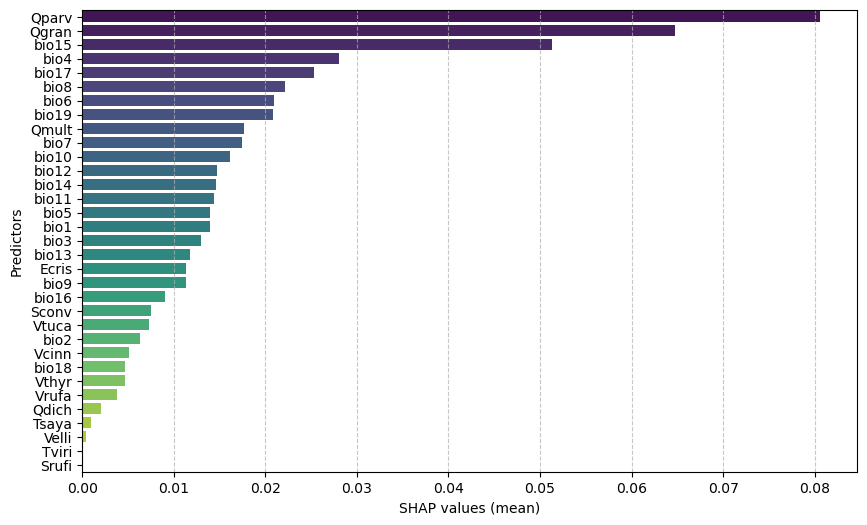

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(y=shap_df["Variável"], x=shap_df["Mean_SHAP"], palette="viridis")

plt.xlabel("SHAP values (mean)")
plt.ylabel("Predictors")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.savefig("shap_importance_barplot.png", dpi=600, bbox_inches="tight")

plt.show()


# Training and evaluating XGBoost and CatBoost models with binary classification metrics

In [150]:
pip install xgboost catboost scikit-learn


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB 435.7 kB/s eta 0:02:46
   ---------------------------------------- 0.1/72.0 MB 1.0 MB/s eta 0:01:10
   ---------------------------------------- 0.2/72.0 MB 1.1 MB/s eta 0:01:03
   ---------------------------------------- 0.3/72.0 MB 1.5 MB/s eta 0:00:50
   ---------------------------------------- 0.4/72.0 MB 1.7 MB/s eta 0:00:42
   ---------------------------------------- 0.5/72.0 MB 1.6 MB/s eta 0:00:45
   ---------------------------------------- 0.7/72.0 MB 2.0 MB/s eta 0:00:37
   ---------------------------------------- 0.7/72.0 MB 2.0 MB/s eta 0:00:37
    --------------------------------------- 0.9/72.0 MB 2.1 MB/s eta 0:00:35
    --------------------------------------- 1.0/72.0 MB 2.0 MB/s eta 0:00:36
    --------------------------------------- 1.2/72.0 MB 2.2 MB/s eta 0:00:33
    ------

In [152]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [154]:
# Training and evaluating a classification model
def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    print(f"\nTraining and evaluating {model_name}...\n")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision_1 = precision_score(y_test, y_pred, pos_label=1)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_1 = f1_score(y_test, y_pred, pos_label=1)
    
    precision_0 = precision_score(y_test, y_pred, pos_label=0)
    recall_0 = recall_score(y_test, y_pred, pos_label=0)
    f1_0 = f1_score(y_test, y_pred, pos_label=0)
    
    print("Performance metrics:")
    print("\nAcuracy:", np.round(acc, 3))
    print("\nFor class 1:")
    print("Precision:", np.round(precision_1, 3))
    print("Recall:", np.round(recall_1, 3))
    print("F1-score:", np.round(f1_1, 3))
    
    print("\nFor class 0:")
    print("Precision:", np.round(precision_0, 3))
    print("Recall:", np.round(recall_0, 3))
    print("F1-score:", np.round(f1_0, 3))


In [156]:
# Define hyperparameters and initialize models
xgb_model = XGBClassifier(n_estimators=200, random_state=10, use_label_encoder=False, eval_metric="logloss")
catboost_model = CatBoostClassifier(iterations=200, random_seed=10, verbose=0)

# Training and evaluating XGBoost
train_and_evaluate_model(xgb_model, "XGBoost", X_train, X_test, y_train, y_test)

# Training and evaluating CatBoost
train_and_evaluate_model(catboost_model, "CatBoost", X_train, X_test, y_train, y_test)


Training and evaluating XGBoost...



C:\Users\eduar\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:11:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Performance metrics:

Acuracy: 0.889

For class 1:
Precision: 0.833
Recall: 0.909
F1-score: 0.87

For class 0:
Precision: 0.933
Recall: 0.875
F1-score: 0.903

Training and evaluating CatBoost...

Performance metrics:

Acuracy: 0.907

For class 1:
Precision: 0.815
Recall: 1.0
F1-score: 0.898

For class 0:
Precision: 1.0
Recall: 0.844
F1-score: 0.915


C:\Users\eduar\AppData\Local\Temp\ipykernel_36456\3582004879.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=feature_importance_df["Variable"], x=feature_importance_df["Importance"], palette="viridis")


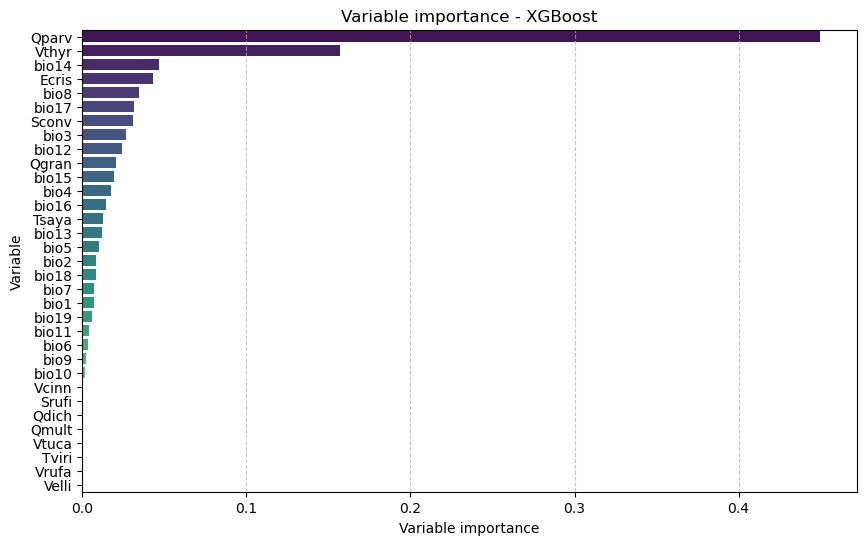

C:\Users\eduar\AppData\Local\Temp\ipykernel_36456\3582004879.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=feature_importance_df["Variable"], x=feature_importance_df["Importance"], palette="viridis")


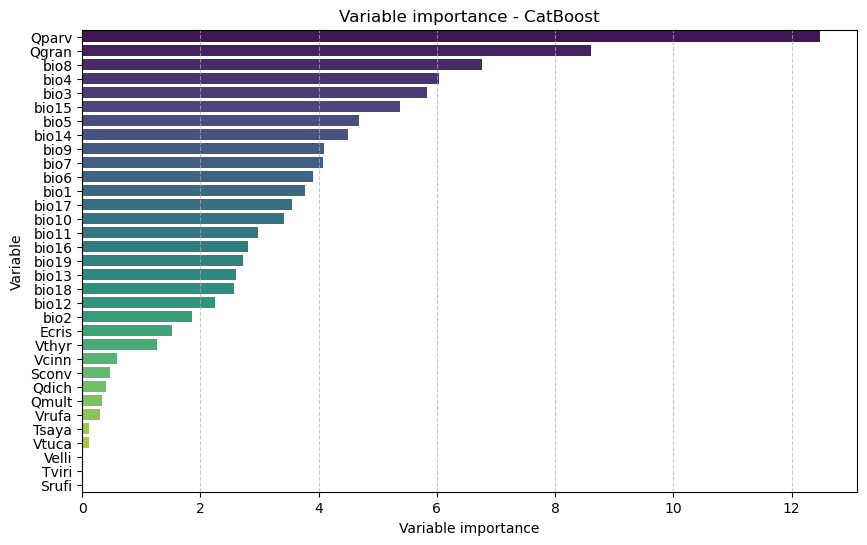

In [158]:
# Creating the graphs

import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(model, model_name, feature_names):
    """Generates a bar chart showing the importance of the variables"""
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feature_importance_df = pd.DataFrame({"Variable": feature_names, "Importance": importances})
        feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(y=feature_importance_df["Variable"], x=feature_importance_df["Importance"], palette="viridis")
        plt.xlabel("Variable importance")
        plt.ylabel("Variable")
        plt.title(f"Variable importance - {model_name}")
        plt.grid(axis="x", linestyle="--", alpha=0.7)

        plt.savefig(f"{model_name}_feature_importance.png", dpi=300, bbox_inches="tight")

        plt.show()
    else:
        print(f"{model_name} It does not have the feature_importances attribute_.")

# Generate graph for XGBoost
plot_feature_importance(xgb_model, "XGBoost", X_train.columns)

# Generate graph for CatBoost
plot_feature_importance(catboost_model, "CatBoost", X_train.columns)
